<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2021/06/PyTorch-1536x864.png'/>

# Introduction

[Pytorch](https://pytorch.org/) is a popular, open source deep learning framework for python developed by [Facebook AI Research](https://ai.facebook.com/) (FAIR). This framework serves three main purposes:
1. Provide an efficient implementation for high dimensional tensor operations that are GPU compatible.
2. Integrates seemless automatic differentiation into tensor operations for easy parameter optimization.
3. Contains implementations for a variety of common deep learning module.

Pytorch differs itself from other deep learning frameworks such as [TensorFlow](https://www.tensorflow.org) in that it builds its computation graphs dynamically at runtime while others may need to build a static computation graph before the actual computation. This makes the code flow more smoothely and debugging much friendlier, making this framework perfect for studying and researching deep learning algorithms. This, however, comes at the cost of the performance optimization required for deployment.

Below, we highlihght some of the main components of pytorch. This presentation is loosely based on the pytorch [60 minute tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). There is a more detailed 
[youtube series](https://pytorch.org/tutorials/beginner/introyt.html) on pytorch which is guaranteed to make you a pytorch master!

In [1]:
# first and foremost... import the pytorch library!
# running this line for the first time may take a while
import torch

# Tensors
<img src="https://pytorch.org/tutorials/_images/tensor_illustration_flat.png" />

A tensor is a multi-dimensional array. Some common mathematical structures are tensors in disguise, e.g., a vector is a one-dimensional tensor and a matrix is a two-dimensional tensor. A matrix of shape $n\times m$ whose values are vecotrs of length $3$ (e.g. an $n\times m$ RGB image), is a three-dimensional tensor of shape $n\times m\times 3$. If we stack $k$ matrices of shape $n\times m$ we get a three-dimensional tensor of shape $k\times n\times m$. These kinds of intuitions are embedded into the core of the pytorch `Tensor` object.


## Numpy

[Numpy](https://numpy.org) is a python package containing fundemental tools for scientific computation, implemented in c/c++ for maximum efficiency. Its intuitive API, generality, scalability, detailed documentation, and top-notch performance are one of the reasons python is vastly popular for scientific programming. Asside from a multitude of useful tools and algorithms, numpy implements the the `ndarray` class for multi-dimensional arrays. We cannot discuss pytorch without mentioning numpy since the `Tensor` object is simply a wrapper for a numpy array that implements additional features.

Below are some examples of basic numpy operations in pytorch. For more operations, a separate notebook is provided on numpy. Although not all funcionality translates directly to pytorch (e.g. torch.cat is the pytorch equivalent of np.concatenate), the differences are well documented on the web.

In [2]:
# tensor from list data
t1 = torch.tensor([[0, 1], [1, 0]])
t2 = torch.tensor([[-1, 0], [0, -1]])
print(f't1 = \n{t1}')
print(f't1 = \n{t2}\n')

t1 = 
tensor([[0, 1],
        [1, 0]])
t1 = 
tensor([[-1,  0],
        [ 0, -1]])



In [3]:
# indexing
t1_v10 = t1[1, 0]
print(f'the value of t1 at index (1, 0) is {t1_v10}\n')

t1_row0 = t1[0]
print(f'row 0 of t1 is {t1_row0}\n')

t1_col1 = t1[:, 1]
print(f'column 1 of t1 is {t1_col1}\n')

the value of t1 at index (1, 0) is 1

row 0 of t1 is tensor([0, 1])

column 1 of t1 is tensor([1, 0])



In [4]:
# reshaping
big_matrix = torch.arange(75).reshape(3, 5, 5)
print(f'reshaped 3x5x5 matrix \n{big_matrix}\n')

reshaped 3x5x5 matrix 
tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24]],

        [[25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64],
         [65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74]]])



In [5]:
# slicing
# NOTE: negative step size is not supported in pytorch. The following will raise an error:
#           `bir_matrix[::-1]`
sliced_matrix = big_matrix[1:3, :, :-1:2]
print(f'sliced big_matrix[1:3, :, :-1:2] = \n{sliced_matrix}\n')

sliced big_matrix[1:3, :, :-1:2] = 
tensor([[[25, 27],
         [30, 32],
         [35, 37],
         [40, 42],
         [45, 47]],

        [[50, 52],
         [55, 57],
         [60, 62],
         [65, 67],
         [70, 72]]])



In [6]:
# math operations

# pointwise operations
print(f't1 + t2 = \n{t1 + t2}\n')  # addition
print(f't1 * t2 = \n{t1 * t2}\n')  # multiplication
print(f't1 & t2 = \n{t1 & t2}\n')  # bitwise AND

# matrix operations
print(f't1 @ t2 = \n{t1 @ t2}\n')  # matrix multiplication
print(f'torch.dot(t1[0],t2[1]) = t1[0] @ t2[1] = {t1[0] @ t2[1]}')  # vector dot product

t1 + t2 = 
tensor([[-1,  1],
        [ 1, -1]])

t1 * t2 = 
tensor([[0, 0],
        [0, 0]])

t1 & t2 = 
tensor([[0, 0],
        [0, 0]])

t1 @ t2 = 
tensor([[ 0, -1],
        [-1,  0]])

torch.dot(t1[0],t2[1]) = t1[0] @ t2[1] = -1


In [7]:
# boolean querries
print(f'if we ask `t1 + t2 == 1`, we get a boolean mask:\n{(t1 + t2) == 1}')
print(f'is there a 1 in `t1 + t2`? {torch.any((t1 + t2) == 1)}')
print(f'are all the values in `t1 + t2` equal to 1? {torch.all((t1 + t2) == 1)}')

if we ask `t1 + t2 == 1`, we get a boolean mask:
tensor([[False,  True],
        [ True, False]])
is there a 1 in `t1 + t2`? True
are all the values in `t1 + t2` equal to 1? False


In [8]:
# masking
# NOTE: this changes the object t1
t1[t2 == 0] = 10
print(f'new t1 after mask assignment is\n{t1}')

new t1 after mask assignment is
tensor([[ 0, 10],
        [10,  0]])


In [9]:
# concatenate over axis (corresponds to np.concatenate)
print(f'concatenate t1 and t2 over dimension 0:\n{torch.cat([t1, t2], dim=0)}\n')
print(f'concatenate t1 and t2 over dimension 1:\n{torch.cat([t1, t2], dim=1)}')

concatenate t1 and t2 over dimension 0:
tensor([[ 0, 10],
        [10,  0],
        [-1,  0],
        [ 0, -1]])

concatenate t1 and t2 over dimension 1:
tensor([[ 0, 10, -1,  0],
        [10,  0,  0, -1]])


## Creating tensors
We can create tensors from python list data

In [10]:
# create tensor from list data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data, dtype=torch.float)  # overrides default dtype
x_data

tensor([[1., 2.],
        [3., 4.]])

and fro numpy data

In [11]:
import numpy as np

# create tensor from numpy
np_data = np.array(data)
x_np = torch.from_numpy(np_data)
x_np

tensor([[1, 2],
        [3, 4]])

Default value initialization of a given shape and type

In [12]:
shape = (2, 3,)
rand_tensor = torch.rand((2, 3))
ones_tensor = torch.ones((1, 4), dtype=torch.int)  # overide default type
zeros_tensor = torch.zeros(3, 2, 2)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5533, 0.5581, 0.7303],
        [0.5208, 0.6388, 0.5421]]) 

Ones Tensor: 
 tensor([[1, 1, 1, 1]], dtype=torch.int32) 

Zeros Tensor: 
 tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])


or use the properties of another tensor

In [13]:
x_ones = torch.full_like(x_data, 10) # retains the properties of x_data
print(f"Tens Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Tens Tensor: 
 tensor([[10., 10.],
        [10., 10.]]) 

Random Tensor: 
 tensor([[0.7719, 0.0731],
        [0.7959, 0.6819]]) 



When a tensor is created, it is bound to a numpy array containing all its values. we can reference this array using the `numpy` function

In [14]:
x_data_arr = x_data.numpy()
x_data_arr

array([[1., 2.],
       [3., 4.]], dtype=float32)

Changing this array will change the values in the tensor as well

In [15]:
x_data_arr[0, 0] = -100
x_data

tensor([[-100.,    2.],
        [   3.,    4.]])

When creating a tensor from a numpy array, the tensor is bound to that array

In [16]:
np_data[0,0] = -200
x_np

tensor([[-200,    2],
        [   3,    4]])

## Changing device

Tensor operations are typically executed faster using [CUDA](https://developer.nvidia.com/cuda-zone), a parallel computing platform and programming model developed by NVIDIA for general computing on graphical processing units (GPUs). By default, tensors are stored in the CPU memory, but can easily be transfered to the GPU. Performing operations between two tensors that are stored in the GPU memory will run via CUDA. To run CUDA locally, one must connect a compatible NVIDIA GPU and install the [CUDA toolkit](https://developer.nvidia.com/cuda-toolkit). However, anyone get (somewhat limmited) access to a GPU through [Google Colab](https://research.google.com/colaboratory/).

In [17]:
# choose device based on availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Chosen device: {device}')

Chosen device: cpu


Tensors can be initialized directly in your specified device

In [18]:
t = torch.rand_like(x_data, device=device)
t.device

device(type='cpu')

and can also be moved back and forth between devices using the `to` mehtod

In [19]:
t_cpu = t.to('cpu')
t_cpu.device

device(type='cpu')

GPU memory is expensive and therefore scarse. Pytorch gives the user full control over which tensors are stored in which device. While this is great for memory management, it requires some maintenance. More on that when we [train a classifier](#section:classifier).

**Note**: tensor operations between tensors on different devices is not supported. 

# Automatic differentiation

Modern day neural networks are heavily reliant on the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) algorithm for parameter optimization. To support this, pytorch offers "automatic differentiation". This mechanism keeps track of gradients of functions with respect to specified tensors. Below is an example of linear regression with gradient descent.

We start by choosing creating two random tensors: `x` for a single input, `y` for a single output, and `W` for the weights. Because we are going to optimize `W`, we would like to keep track of its gradients. To have pytorch do this automatically, we must set the `requires_grad` parameter to `True` (defaults to `False`).

In [20]:
x = torch.eye(3)[0]  # simple input: [1, 0, 0]
y = torch.rand([])  # empty shpae gives a scalar tensor (no shape)
W = torch.rand(3, requires_grad=True)  # requires_grad defaults to 
x, y, W

(tensor([1., 0., 0.]),
 tensor(0.9748),
 tensor([0.1507, 0.1713, 0.8677], requires_grad=True))

We can use our tensors to to compute the squared loss of predicting `y` as a linear function of `x`.

In [21]:
Wx = W @ x
squared_loss = (Wx - y) ** 2
Wx, squared_loss

(tensor(0.1507, grad_fn=<DotBackward0>),
 tensor(0.6790, grad_fn=<PowBackward0>))

We note that the outputs of these operations are `Tensor` objects, not `float` (as with numpy). This is because pytorch needs to maintain the gradient that it must use to obtain the gradient of that operation. For example, the `Wx` tensor will use the dot product gradient function. The squared loss uses uses the power gradient function since the last opperation performed was the "squared" operation. Notice that the "subtraction" operation is unaccounted for, but trust that it is not forgotten and is maintained behind the scenes.

We can now call the `backward` method to invoke the chain rule and propagate the gradient to the  tensors that require a gradient. After the `backward` operation has been completed, the `grad` property of these tensors will be the gradient tensor.

In [22]:
squared_loss.backward()
W.grad

tensor([-1.6481, -0.0000, -0.0000])

The `grad` property will accumulate the gradients over all operations until it is reset

In [23]:
# reset gradient
W.grad = None

# call to `backward` reset the computation graph, so we must reset rerun the operations
squared_loss = (W @ x - y) ** 2

# compute gradient 5 times
for i in range(5):
    squared_loss.backward(retain_graph=True)  # keeps computation graph, no need to rerun ops
    print(f'cur grad: {W.grad}')

cur grad: tensor([-1.6481, -0.0000, -0.0000])
cur grad: tensor([-3.2961, -0.0000, -0.0000])
cur grad: tensor([-4.9442, -0.0000, -0.0000])
cur grad: tensor([-6.5923, -0.0000, -0.0000])
cur grad: tensor([-8.2404, -0.0000, -0.0000])


Lastly, some operations should not be a part of the computation graph. To exclude them, we sue the `no_grad` context manager. This will exclude the operations from the computation graph and avoid expensinve gradient computations. An example of operations we may want to exclue is the weight update step.

In [24]:
with torch.no_grad():
    Wx = W @ x

Wx

tensor(0.1507)

We now have everything we need to implement linear regression on the single example `x` using gradient descent with automatic differentiation. You can play around with the parameters to fine-tune the algorithm.

In [25]:
EPOCHS = 100  # number of iterations
LEARNING_RATE = 2e-2  # weight update scaling
PRINT_EVERY = 10

losses = []
for epoch in range(1, EPOCHS + 1):
    squared_loss = (W @ x - y) ** 2
    
    # reset W's gradient
    W.grad = None
    
    #backward operation
    squared_loss.backward()
    
    # update weights
    with torch.no_grad():
        W -= W.grad * LEARNING_RATE
    
    
    # save epoch loss for later visualisation
    # use `item()` to get the float value (cannot use tensor for plotting)
    losses.append(squared_loss.item())
    
    # report on fitting progress
    if epoch % PRINT_EVERY == 0:
        print(f'epoch {epoch} loss: {losses[-1]}')

epoch 10 loss: 0.325668066740036
epoch 20 loss: 0.14394605159759521
epoch 30 loss: 0.06362447887659073
epoch 40 loss: 0.02812216803431511
epoch 50 loss: 0.01243007555603981
epoch 60 loss: 0.0054941256530582905
epoch 70 loss: 0.0024284173268824816
epoch 80 loss: 0.0010733637027442455
epoch 90 loss: 0.0004744287289213389
epoch 100 loss: 0.00020969787146896124


During training, we collected the loss value at every epoch. We can plot these losses to show that our gradient descent algorithm is indeed fitting and that the automatic differentiation mechanism works. Notice that we must use the `item` method to unwrap the `Tensor` object and retrieve the actual `float` value since tensors cannot be plotted. We use the `matplotlib` library below, but we will later use the `tensorboard` to visualize our results.

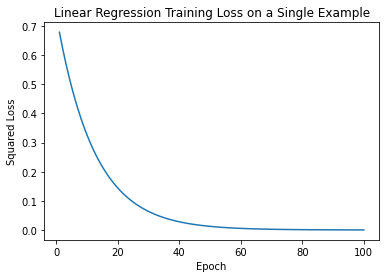

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.title('Linear Regression Training Loss on a Single Example')
plt.xlabel('Epoch')
plt.ylabel('Squared Loss')
plt.plot(range(1, EPOCHS + 1), losses);

# Neural networks

Pytorch provides many tools and building blocks used in state-of-the-art neural networks. This is implemented in the `nn` package, which includes activations, losses, and commonly used layer modules such as fully connected layers and convolutional layers. If you are unfamiliar with these terms, consider reading [this blog post](https://adgefficiency.com/guide-deep-learning/). Furthermore, you can find everything this package has to offer in the [documentation](https://pytorch.org/docs/stable/nn.html).

## Layers

Pytorch implements many different layers, from basic linear and convolutional layers, to more complex recurrent and transformer layers, and even parameter-free layers such as batch-norm and dropout. Below are a few examples of these layers:

In [27]:
# A fully connected (a.k.a. Linear, a.k.a Dense) layer
# takes input of shape (num_samples, 100) and returns an output of (num_samples, 5)
# bias is `True` by default.
fully_connected_layer = torch.nn.Linear(in_features=100, out_features=5)

# 1D convolutional layer
# takes input of shape (num_samples, 2, N) where N is the input vector length.
# the sliding kernel is of length 5.
# output is of shape (num_sampels, 16, N - 5 + 1)
# bias is `True` by default.
convolution1d_layer = torch.nn.Conv1d(in_channels=2, out_channels=16, kernel_size=5)

# 1D convolutional layer
# takes input of shape (num_samples, 3, N, M) where NxM is the shape of the input matrix.
# the sliding kernel is of shape 3x3.
# output is of shape (num_sampels, 32, N - 3 + 1, M - 3 + 1)
# bias parameter omited.
convolution2d_layer = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3),
                                      bias=False)

# A pooling layer accoring to the maximal value in the neighborhood.
# pooling with a 2x2 sliding window with a non-overlapping stride.
# takes input of shape (num_samples, num_channels, N, M)
# output is of shape (num_samples, num_channels, N//2, M//2)
# no parameters
maxpool_layer = torch.nn.MaxPool2d(kernel_size=2, stride=2)

# A recurrent neural network layer
# the input is of shape (L, num_samples, 1000) where L is the sequence length
# output is a batch of hidden states of shape (L, num_samples, 100)
# hidden states are of size (2, 100)
recurrent_layer = torch.nn.RNN(input_size=1000, hidden_size=100, num_layers=2)

## Activations

Activation functions, sometimes called non-linearities, are used to break the linearity between basic layers. Below are some popular activation functions in `nn`.

In [28]:
# Rectified Linear Unit
# f(x) = max(x, 0)
relu_activation = torch.nn.ReLU()

# Sigmoid
# f(x) = 1 / (1 + e^(-x))
sigmoid_activation = torch.nn.Sigmoid()

# Hyperbolic tangent
# f(x) = (e^x - e^(-x)) / (e^x + e^(-x))
tanh_activation = torch.nn.Tanh()

## Losses

Loss functions are also implemented in `nn`, letting users optimize many popular objectives. Below are some comonly used loss functions.

In [29]:
# mean squared error loss for regression
# mse(y, y') = (y - y')^2
# where y is the ground truth and y' is the prediction
mse_loss = torch.nn.MSELoss()

# negative log likelihood loss
# NLL(y, y') = log(p(y' = y))
nll_loss = torch.nn.NLLLoss()

# hinge loss (for SVM)
# hinge(y, y') = max(1 - y*y', 0)
hinge_loss = torch.nn.HingeEmbeddingLoss()

## The Module class

The basic neural network building block in `nn` is the `Module` object. This object encapsulates a layer's parameters and helps maintain a record of required gradients for back propagation. In fact, layers, activations, and losses are all examples of `Module` objects.

Modules are callable. Invoking them will call their `forward` method which runs a forward pass of the network's computational graph.

In [30]:
fully_connected_output = fully_connected_layer(torch.rand(15, 100))
fully_connected_output.shape

torch.Size([15, 5])

Note that most modules are designed to run on **batches** of inputs to encourage parallel computation.

We can view a modules's parameters by using the `parameters` method. This is a generator of all parameters in the module. For example, a linear layer with no bias has exactly 1 parameter (which is `W`).

In [31]:
no_bias_linear = torch.nn.Linear(100, 100, bias=False)
len(list(no_bias_linear.parameters()))

1

We can chain layers together using `nn.Sequential`. For example, the below cahins 2 linear layers and a leaky ReLU activation into a single module. The chained modules each have 1 parameter, but the sequential model his aware of both. Furthermore, invoking the module will result in an output shape of the final layer. Layers must be compatible, i.e., the first layer's output must be the same size as the second layer's input, and so on.

In [32]:
two_layer_fc = torch.nn.Sequential(
    torch.nn.Linear(100, 50, bias=False),
    torch.nn.LeakyReLU(negative_slope=1e-3),
    torch.nn.Linear(50, 10, bias=False)
)
out = two_layer_fc(torch.rand(10, 100))

print(f'output shape:   {out.shape}')
print(f'num parameters: {len(list(two_layer_fc.parameters()))}')

output shape:   torch.Size([10, 10])
num parameters: 2


Modules are also stored in a particulary device. We can move a module from one device to another using the `to` method, jsut as we would a tensor. This moves all parameters to the parameters of this module.

In [33]:
fully_connected_layer.to(device)
for i, parameter in enumerate(fully_connected_layer.parameters(), 1):
    print(f'parameter {i} device: {parameter.device}')

parameter 1 device: cpu
parameter 2 device: cpu


## Custom Modules

We can create custom modules by extending the `Module` class. A subclass of `Module` should register its inner parameters and modules in the `__init__` function, and use them to compute the `forward` method's output. Registered parameters with `requires_grad=True` and modules will be included in the `backward` call when using automatic differentiation. Furthermore, they will be transfered to the desired device when calling the `to` method.

Let us create our very own convolutional neural network (CNN):

In [34]:
# for easy coding, import nn directly
from torch import nn

class MyCNN(nn.Module):
    def __init__(self, num_input_channels):
        super().__init__()
        
        # regirstration option 1:
        # save basic layers as public instance variables
        self.conv1 = nn.Conv2d(num_input_channels, 16, 3)
        self.relu1 = nn.ReLU()
        
        # registration option 2:
        # combine basic layers to a single public instance variable
        self.conv2_and_relu2 = nn.Sequential(nn.Conv2d(16, 4, 3), nn.ReLU())
        
        # registration option 3:
        # use the `add_module` function
        self.add_module('classifier', nn.Linear(400, 3))
        
    def forward(self, x):
        # invoke first layer module by module
        x = self.conv1(x)
        x = self.relu1(x)
        
        # invoke sequential module
        x = self.conv2_and_relu2(x)
        
        # invoke internally registered module
        x = x.flatten(start_dim=1)
        x = dict(self.named_modules())['classifier'](x)
        
        return x

my_cnn = MyCNN(num_input_channels=3).to(device)
my_cnn  # printing a module will show all registered modules in order of registration

MyCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (conv2_and_relu2): Sequential(
    (0): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (classifier): Linear(in_features=400, out_features=3, bias=True)
)

In [35]:
out = my_cnn(torch.rand(14, 3, 14, 14))
print(f'output shape: {out.shape}')

output shape: torch.Size([14, 3])


## Visualising modules

We already saw that printing a module gives a general sense of its structure. To visualize the computational graph in a more interactive fashion, we can use `tensorboard`. This is an extension to pytorch (and other tensor-centric libraries)

In [36]:
# load tensorboard extension to enable showing tensorboard directly in the notebook
%load_ext tensorboard

# use a SummaryWriter to save the graph
from torch.utils.tensorboard import SummaryWriter

# use pathlib to get the current home folder where the dataset will be saved
from pathlib import Path

# initialize summary_writer
writer = SummaryWriter(Path('demo_boards') / 'net_graph_demo' / 'graph')
writer.add_graph(my_cnn, torch.rand(14, 3, 14, 14))
writer.close()

In [37]:
%tensorboard --logdir=demo_boards/net_graph_demo

More on tensorboard in the [documentation](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html).

<a id='section:classifier'></a>

# Training a classifier

In machine learning, classification is the task of separating data into different classes.

<img src='https://www.herevego.com/wp-content/uploads/2020/06/linear_vs_nonlinear.jpg' />

Formally, given a sample set $S = \{(x_i, y_i)\}_{i=1}^m \in \mathcal{X}\times\mathcal{Y}$ where $\mathcal{X}$ is the feature space, $\mathcal{Y} = \{1, ..., n - 1\}$ is the label space, and all $(x_i, y_i)$ were sampled I.I.D. from $\mathcal{X}\times\mathcal{Y}\sim D$. Our objective is to find a classifier $h:\mathcal{X}\rightarrow\mathcal{Y}$ that minimizes the generalization error:
$$\mathcal{L}_D(h) = \mathbb{E}_{(x,y)\sim D}[\mathbf{1}_{h(x)=y}]$$
that is, we want to want to generalize to the entire distribution even though we only have a sample $S$ from that distribution.

Below we implement a classifier for [MNIST](http://yann.lecun.com/exdb/mnist/), a dataset of grayscale images of handwritten digits.

## Torch extensions and torchvision

There are some very popular extensions to pytorch. Some examples include
- [torchaudio](https://pytorch.org/audio/stable/index.html) - a library for audio and signal processing.
- [torchtext](https://pytorch.org/text/stable/index.html) - an extension for tensor-driven natural language processing.
- [pytorch-geometric](https://pytorch-geometric.readthedocs.io/en/latest/) - a library built upon PyTorch to easily write and train Graph Neural Networks.

Some extensions maintained by the pytorch developers and others are not. We will be using [torchvision](https://pytorch.org/vision/stable/index.html), a deep learning framework for computer vision, to load the MNIST dataset.

In [38]:
# import torchvision and torchvision.
import torchvision

# import transforms for casting PIL images to pytorch tensors
import torchvision.transforms as tf

# load the training dataset
ds_train = torchvision.datasets.MNIST(root=Path.home() / '.pytorch-datasets',
                                      train=True,  # training set
                                      download=True,  # download if doesn't exist
                                      transform=tf.ToTensor())  # conver PIL to tensor

# load the test dataset
ds_test = torchvision.datasets.MNIST(root=Path.home() / '.pytorch-datasets',
                                     train=False,  # test set
                                     download=True,  # download if doesn't exist
                                     transform=tf.ToTensor())  # conver PIL to tensor

Torchvision also implements select neural network architectures that come packaged with weights pre-trained on the [ImageNet](https://www.image-net.org/) dataset. For example, below we initialize a resnet18 CNN.

In [39]:
resnet = torchvision.models.resnet18()
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

With MNIST, however, we do not need such a complex architecture.

## Datasets and DataLoaders

Loading the data in a way that is compatible with the deep learning model is trickier than it seems. For example:
* data may be too large to fit in memory.
* the raw data may need some type casting.
* we may want to run a common preprocessing function on all the data.

`torch.utils.data.Dataset` and `torch.utils.data.DataLoader` objects attempt to encapsulate some of the common requirements for data loading. Datasets enforce a unified API for any data type for loading data into memory and data access via indexing or iteration. The MNIST datasets that we loaded earlier are of the `Dataset` class. This means that they can be indexed and measuerd:

num of training samples: 60000
first training sample shape: torch.Size([1, 28, 28])


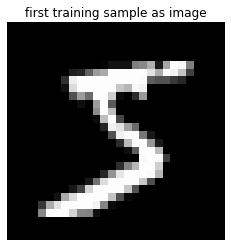

first training label: 5


In [40]:
print(f'num of training samples: {len(ds_train)}')

sample, label = ds_train[0]
print(f'first training sample shape: {sample.shape}')

plt.axis('off')
plt.title('first training sample as image')
sample_img_format = sample.permute(1, 2, 0)  # move channels dim to the end
plt.imshow(sample_img_format, cmap='gray')
plt.show()  # force show before the label

print(f'first training label: {label}')

A DataLoader object is a batch loading tool for datasets. They offer batch size control, dataset shuffling, multi-threaded, specific sampling, and many more features. Below is a simple example of single-threaded DataLoaders for the training dataset that loads batches of 4 images and shuffles the data.

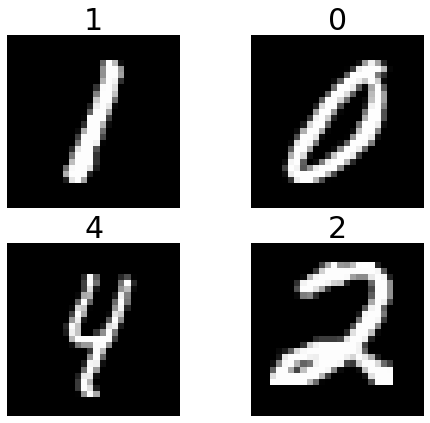

In [41]:
from torch.utils.data import DataLoader

def plot_4by4_image_batch(image_batch, label_batch):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 7))
    ax1.axis('off')
    ax1.imshow(image_batch[0].squeeze(), cmap='gray')
    ax1.set_title(label_batch[0].item(), fontsize=30)
    ax2.axis('off')
    ax2.imshow(image_batch[1].squeeze(), cmap='gray')
    ax2.set_title(label_batch[1].item(), fontsize=30)
    ax3.axis('off')
    ax3.imshow(image_batch[2].squeeze(), cmap='gray')
    ax3.set_title(label_batch[2].item(), fontsize=30)
    ax4.axis('off')
    ax4.imshow(image_batch[3].squeeze(), cmap='gray')
    ax4.set_title(label_batch[3].item(), fontsize=30)
    plt.show()

dl_train = DataLoader(ds_train, batch_size=4, shuffle=True)

for image_batch, label_batch in dl_train:
    plot_4by4_image_batch(image_batch, label_batch)
    break

Datasets and data-loaders have many options, features, and variations. Further reading can be found in the [documentation](https://pytorch.org/docs/stable/data.html).

## Optimizers

[Pytorch optimizers](https://pytorch.org/docs/stable/optim.html) handle parameter optimization. an optimizer is bound to a set of parameters. After a model has completed its forward pass, the optimizer will handle gradient step updates for all parameters that require a gradient. There are a number of different optimization techniques, each implemented as a different optimizer class. Below is an example of an `SGD` optimizer that implements stochastic gradient descent, bound to our previously initialized resnet model. The `SGD` optimizer requires an additional learning rate parameter `lr`, and implements other features such as [L2 regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) via the `weight_decay` parameter.

In [42]:
from torch.optim import SGD

optimizer = SGD(resnet.parameters(), lr=1e-3, weight_decay=1e-5)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 1e-05
)

Optimizers have 2 main methods: `step` and `zero_grad`. `zero_grad` resets all bound parameter gradients before the `backward` call (since gradients are accumulated unless they are reset). `step` updates all bound parameters via the optimizer's update rule, e.g., gradient descent in SGD. In the next section, we will use these methods in the training code.

## Training

We are now ready to train a classifier from scratch. We will use a basic linear classifier trained using stochastic gradient descent. Let us first define our model.

In [43]:
# set random seed for reproducibility
# This will cause the model parameters to be initializes the same way every time
torch.manual_seed(24)

# define our learning model
model = nn.Linear(in_features=torch.numel(ds_train[0][0]), out_features=10)
model

Linear(in_features=784, out_features=10, bias=True)

Let us write a function for training a single epoch. Since each epoch will evaluate both the training and the test sets, we write a single function that calculates gradients and updates parameters only when providing an optimizer.

In [44]:
def run_epoch(model, dl, loss_fn, optimizer):
    # training step only performed if an optimizer is provided
    training_mode = optimizer is not None

    # set training mode for model
    model.train(training_mode)
    
    # aggregators of loss and correct predictions (for calculating accuracy)
    total_loss = 0
    num_correct = 0
    
    # iterate batches
    for batch_obs, batch_actions in dl:
        # gradients are required only if training
        with torch.set_grad_enabled(mode=training_mode):
            batch_obs = batch_obs.flatten(start_dim=1)
            scores = model(batch_obs)
            loss = loss_fn(scores, batch_actions)
            preds = torch.argmax(scores, dim=-1)

        # optimization step required only if training
        if training_mode:
            
            # reset all gradients
            optimizer.zero_grad()
            
            # calculate gradients
            loss.backward()
            
            # update parameters
            optimizer.step()
        
        # aggregate loss and correct predictions
        total_loss += loss.item()
        num_correct += (batch_actions == preds).sum().item()
    
    # return mean loss and accuracy
    return total_loss / len(dl), num_correct / len(dl.dataset)

We now have define our training hyperparameters. Note that there can be many (many) more.

In [45]:
NUM_EPOCHS = 20
BATCH_SIZE = 64
SHUFFLE = False
LEARNING_RATE=1e-3
PRINT_EVERY = 1


Finally, we can train our linear classifier.

In [46]:
# set random seed for reproducibility
torch.manual_seed(42)

# initialize data-loaders
dl_train = DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
dl_test = DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=False)  # only for eval

# initialize an SGD optimizer for the given model's parameters
optimizer = SGD(model.parameters(), lr=LEARNING_RATE)

# initialize the loss function
# use cross entropy loass for logistic regression (convex problem)
loss_fn = nn.CrossEntropyLoss()

# log training performance for tensorboard
writer = SummaryWriter(Path('demo_boards') / 'training' / 'results')


# iterate through epochs
for i in range(1, NUM_EPOCHS + 1):
    # training epoch
    train_loss, train_acc = run_epoch(model, dl_train, loss_fn, optimizer)
    
    # log training results for tensorboard
    writer.add_scalar('training loss', train_loss, i)
    writer.add_scalar('training accuracy', train_acc, i)

    # validation epoch. no optimizer <==> no training
    test_loss, test_acc = run_epoch(model, dl_test, loss_fn, optimizer=None)
    
    # log test results for tensorboard
    writer.add_scalar('test loss', test_loss, i)
    writer.add_scalar('test accuracy', test_acc, i)

    # log epoch progress if necessary
    if i % PRINT_EVERY == 0:
        print(f'epoch {i}:')
        print(f'avg training loss       = {train_loss}')
        print(f'avg test loss           = {test_loss}')
        print(f'training acc            = {train_acc}')
        print(f'test acc                = {test_acc}')
        print('====================================================')
        print()

# close writer and flush data
writer.close()

epoch 1:
avg training loss       = 1.8975644101466198
avg test loss           = 1.5668361817195917
training acc            = 0.5835333333333333
test acc                = 0.7642

epoch 2:
avg training loss       = 1.384784778552269
avg test loss           = 1.2028603925826444
training acc            = 0.77835
test acc                = 0.8133

epoch 3:
avg training loss       = 1.1177420377222969
avg test loss           = 1.0025153198059957
training acc            = 0.8099
test acc                = 0.8303

epoch 4:
avg training loss       = 0.9620047477262614
avg test loss           = 0.8788066191278445
training acc            = 0.8240166666666666
test acc                = 0.8424

epoch 5:
avg training loss       = 0.8610462445948424
avg test loss           = 0.7951256638499582
training acc            = 0.8335833333333333
test acc                = 0.8512

epoch 6:
avg training loss       = 0.7902043135181419
avg test loss           = 0.7346186966273436
training acc            = 0.8402333

Throughout training, we logged the model's performance on the training and test set to tensorboard

In [47]:
%tensorboard --logdir=demo_boards/training

# Conclusion

Pytorch is a very powerful tool for deep learning. In this tutorial, we only scratched the surface of its capabilities. The [pytorch documentation](https://pytorch.org/docs/stable/index.html) is filled with additional features, some general, and some earily specific. There, you will also find documentation for extensions like torchtext and torchvision. However, as with many code libraries, best way to learn to use this library is by using it.